In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
from __future__ import division

In [2]:
data, samplerate = sf.read('../data/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac')

In [3]:
samplerate, len(data)/samplerate

(16000, 14.085)

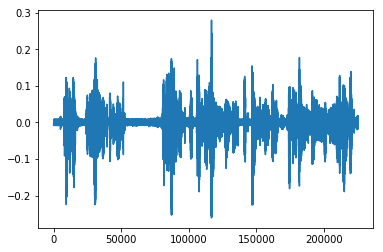

In [4]:
plt.plot(data)
plt.show()

In [5]:
df = pd.read_csv('../data/LibriSpeech/SPEAKERS.TXT',skiprows=11,delimiter='|',error_bad_lines=False)
df.columns = [col.strip().replace(';','').lower() for col in df.columns]
df = df.assign(
    sex=df['sex'].apply(lambda x: x.strip()),
    subset=df['subset'].apply(lambda x: x.strip()),
    name=df['name'].apply(lambda x: x.strip()),
)
df

,id,sex,subset,minutes,name
0,14,F,train-clean-360,25.03,Kristin LeMoine
1,16,F,train-clean-360,25.11,Alys AtteWater
2,17,M,train-clean-360,25.04,Gord Mackenzie
3,19,F,train-clean-100,25.19,Kara Shallenberg
4,20,F,train-other-500,30.07,Gesine
5,22,F,train-clean-360,25.14,Michelle Crandall
6,23,F,train-clean-360,25.23,Anita Roy Dobbs
7,25,M,train-other-500,30.16,John Gonzalez
8,26,M,train-clean-100,25.08,Denny Sayers
9,27,M,train-clean-100,20.14,Sean McKinley


In [6]:
trainset = 'train-clean-100'
validset = 'dev-clean'

In [7]:
df.groupby(['subset','sex']).agg({'name': 'nunique', 'minutes': 'sum'})

minutes  name
subset          sex                
dev-clean       F      161.45    20
                M      161.83    20
dev-other       F      151.83    16
                M      155.45    17
test-clean      F      161.50    20
                M      162.70    20
test-other      F      159.19    17
                M      161.32    16
train-clean-100 F     3023.18   125
                M     3012.23   126
train-clean-360 F    10437.86   439
                M    11378.53   482
train-other-500 F    14458.23   562
                M    15353.15   601

In [8]:
df[df['subset']=='dev-clean']

,id,sex,subset,minutes,name
46,84,F,dev-clean,8.02,Christie Nowak
93,174,M,dev-clean,8.04,Peter Eastman
135,251,M,dev-clean,8.04,Mark Nelson
200,422,M,dev-clean,8.38,President Lethe
279,652,M,dev-clean,8.31,Scott Walter
318,777,M,dev-clean,8.06,fling93
470,1272,M,dev-clean,8.02,John Rose
529,1462,F,dev-clean,8.04,E. Tavano
595,1673,F,dev-clean,8.07,Tonia
681,1919,F,dev-clean,8.17,nprigoda
